In [101]:
import graph_tool as gt
import graph_tool.collection as gtc
import graph_tool.draw as gtd

import numpy as np
import itertools
import time
import math

In [111]:
#auxiliaries for testing LOCALGRAPHLET 

#specific graphs for testing

def graph(t):
    """given string type of graph, returns graph type"""
    G = gt.Graph(directed = False)
    if t == 'triangles_random':
        G.add_edge_list([(0,1),(1,2),(2,0),(2,3),
                         (3,4),(4,2),(4,5),(5,2),
                         (6,7),(7,8),(6,8),(6,9),
                         (9,8),(6,10),(10,8),(4,11),
                         (11,6)])
    if t == 'line_triangle':
        G.add_edge_list([(1,2),(2,3),(3,4),(4,2),(4,5),(5,6),(6,7),(7,5),(5,8),(8,0)])
    if t == 'siam':
        G.add_edge_list([[0, 1],[1, 2],[1, 3],[2, 4],
                         [2, 5],[3, 2],[3, 6],[5, 8],
                         [5, 7],[6, 7],[6, 5],[7, 9]])
    if t == '2star':
        G.add_edge_list([(1,2),(2,3),(3,4),(3,5),
                         (3,6),(3,7),(3,8),(3,9),
                         (3,10),(10,11),(11,13),
                         (12,13),(13,14),(13,15),
                         (15,0)])
    if t == 'circle':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,0)])
    if t == 'single_2star':
        G.add_edge_list([(0,1),(1,2)])
    if t == 'single_3star':
        G.add_edge_list([(0,1),(1,2),(1,3)])
    if t == 'single_4star':
        G.add_edge_list([(0,1),(1,2),(1,3),(1,4)])
    if t == 'brest':
        import pandas as pd
        df = pd.read_csv("/Users/endingalaporte/Desktop/planning/W10_0504-1204_GRAPHLET_CENTRALITY/edgelist_brest.csv")
        edge = np.array([np.array(df['0.000000000000000000e+00'].values).astype(int),
                         np.array(df['1.000000000000000000e+00'].values).astype(int)])
        edge = edge.T
        G = gt.Graph(directed = False)
        G.add_edge_list(edge)
    if t == 'squares':
        G.add_edge_list([(0,1),(1,3),(3,2),(0,2),(2,4),(3,5),(5,4)])
    if t == 'single_square':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,0)])
    if t == 'single_triangle':
        G.add_edge_list([(0,1),(1,2),(2,0)])
    if t == 'triangles':
        G.add_edge_list([(0,1),(0,2),(1,2),(1,3),(3,2),(3,5),(3,4),(2,4),(4,5)])
    if t == 'line':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4)])
    if t == 'isolated_G1':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(3,8),(4,8)])
    if t == 'isolated_G2':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(3,8)])
    if t == 'isolated_G5':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(8,3),(8,4),(8,9),(9,3),(9,4)])
    if t == 'isolated_G6':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(8,3),(8,4),(8,9),(9,4)])
    if t == 'isolated_G7_edge_belongs':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(8,3),(8,4),(8,9)])
    if t == 'isolated_G7_vertex_belongs':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(8,3),(8,9),(8,10),(9,10)])
    if t == 'isolated_G8':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(8,3),(8,9),(9,4)])
    if t == 'isolated_G9_vertex_belongs':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(8,3),(8,9),(8,10)])
    if t == 'isolated_G9_edge_belongs':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(3,8),(3,9)])
    if t == 'isolated_G10_vertex_belongs':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(3,8),(8,9),(9,10)])
    if t == 'isolated_G10_edge_belongs':
        G.add_edge_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(4,8),(8,9)])
    return G

def draw(G : gt.Graph):
    """given graph G, draw it"""
    gtd.graph_draw(G, edge_text = G.edge_index, vertex_text=G.vertex_index, output_size = (600,600))
    return

In [122]:
#core

def x9_counts(a : list,b : list,c):
    """given a b c respectively lists Su, Sv and count x7 integer, returns integer count x9"""
    if len(a)>=2 and len(b) >= 2:
        x9_count = k_parmi_n(2, len(a)) + k_parmi_n(2, len(b)) - c
    if len(a)<2 or len(b) <2:
        x9_count = 0
    return x9_count
    
def x6_count(a : list, b):
        """given a and b, where a is list Te and b is count integer x5, returns counts x6"""
        if len(a) >= 2:
            x6_count = k_parmi_n(2, len(tuple(a))) - b
        if len(a) < 2:
            x6_count = 0
        return x6_count
    
def update_vertices_including(old_array : np.ndarray, v1 : gt.libgraph_tool_core.Vertex):
    """given array and vertex object, return array including one time the vertex"""
    if v1 not in old_array:
        new_array = np.append(old_array, v1)
    if v1 in old_array:
        new_array = old_array
    return(new_array)

def update_vertices_without(old_array : np.ndarray, v1 : gt.libgraph_tool_core.Vertex):
    """given array and vertex object, returns array without the object"""
    new_array = old_array[old_array != v1]
    return(new_array)

def k_parmi_n(k,n):
    """binomial coefficient k parmi n"""
    num = np.math.factorial(n)
    denom = np.math.factorial(k)*np.math.factorial(n-k)
    return num/denom

def d(w):
    """given vertex w, returns its total degree"""
    return (w.in_degree() + w.out_degree())

def S_set(e : gt.libgraph_tool_core.Edge, w : gt.libgraph_tool_core.Vertex):
    """given edge e and w vertex, gives set Sw"""
    Sw = []
    v = e.source()
    u = e.target()
    neigh_w = list(w.all_neighbors())
    if w == v: #Sv
        neigh_w.remove(u)
    if w == u: #Su
        neigh_w.remove(v)
    for w in neigh_w:
        Sw.append(w)
    return Sw

def Te_set(e : gt.libgraph_tool_core.Edge):
    """given graph G and edge e, returns set of vertices Te that form triangles with edge e"""
    v = e.source()
    u = e.target()
    Te = []
    
    #create iterator over all vertex neighbors of v and u, remove repeated vertex, remove v and u
    ite_without_repeat = list(itertools.chain(v.all_neighbors(), u.all_neighbors()))
    for w in v.all_neighbors():
        if w in u.all_neighbors():
            ite_without_repeat.remove(w)
    ite_without_repeat.remove(u) #should remove u and v from this, otherwise we test
    ite_without_repeat.remove(v) #if u is in u and it is, but can be triangle with itself
    
    #create Te set of vertices following math definition of the set Te    
    for w in ite_without_repeat:
        if (w in v.all_neighbors()) and (w in u.all_neighbors()):
            Te.append(w)
    return(Te)

def LOCALGRAPHLET(G : gt.Graph, e : gt.libgraph_tool_core.Edge):
    """given graph G and edge e, returns graphlet G1,G2,G5,G6,G7,G8,G9,G10 degree vector of the edge"""
    #graphlet counts
    x5 = 0
    x7 = 0
    x8 = 0
    sigma = 0
    
    #lookup table is a dictionnary
    psi = dict()
    
    #vertices objects and sets of vertices objects e = (v, u) #not (u, v) order matters
    v = e.source()
    u = e.target()
    Sv = S_set(e, v)
    Su = S_set(e, u)
    
    #set of edge objects
    Te = Te_set(e) 
    
    avant = len(Te)
    #count graphlets x5, x7, x8 directly in graph
    for w in v.all_neighbors():
        if w != u: #line 3
            Sv = update_vertices_including(np.array(Sv, dtype = gt.libgraph_tool_core.Vertex), w).tolist()
             #ICI ON AVAIT LA RAISON POUR LAQUELLE ON A UN 2STAR DE PLUS QUI TOUCHE LE EDGE, code dégueu, si algo foncitonne pas, regfaire en numpy
            psi[w] = 'lambda1'
    for w in u.all_neighbors():
        if w != v: #line 5
            if (w in psi.keys()) == True: #c'est deux ligne précédentes correspondent elles à a ligne 6 de l'alg 2? si oui, où placer le else
                if psi[w] == 'lambda1': #careful to check w is a key of dictionnary psi before calling value psi[w]
                    Te = update_vertices_including(np.array(Te, dtype = gt.libgraph_tool_core.Vertex), w).tolist() 
                    #ICI ON AVAIT LA RAISON POUR LAQUELLE ON A TRIANGLE EN PLUS QUI TOUCHE EDGE
                    psi[w] = 'lambda3'   
                    Sv = update_vertices_without(np.array(Sv, dtype = gt.libgraph_tool_core.Vertex), w).tolist()
            if ((w in psi.keys()) == True and psi[w] != 'lambda') or (w not in psi.keys()): #equivilent of line 9 else
                #DOUTE, faut les où éplacer le else schant que la ligne 6 est codée en deux içi?  
                Su = update_vertices_including(np.array(Su, dtype = gt.libgraph_tool_core.Vertex), w).tolist()
                psi[w] = 'lambda2' #ERREUR OUBLIE DE LIGNE WESH!!!
            
            
            
    ##CONTINUER LECTURE DU CODE LIGNE 10
    for w in Te:
        for r in w.all_neighbors():
            if (r in psi.keys()) == True:
                if psi[r] == 'lambda3':
                    x5 = x5 +1
                psi[w] = 'lambda4'
    for w in Su:
        for r in w.all_neighbors():
            if (r in psi.keys()) == True:
                if psi[r] == 'lambda1':
                    x8 = x8 + 1
                if psi[r] == 'lambda2':
                    x7 = x7 + 1
                if psi[r] == 'lambda4':
                    sigma = sigma + 1
        psi[w] = 0
    for w in Sv:
        for r in w.all_neighbors():
            if (r in psi.keys()) == True: #is it necessary to check if r in psi.keys() here? Did we did it just before?
                if psi[r] == 'lambda1':
                    x7 = x7 + 1
                if psi[r] == 'lambda4':
                    sigma = sigma + 1
        psi[w] = 0
    
    #graphlets counts x1, x2, x6, x9, x10 deduced
    
    x1 = len(Te)
    x2 = (d(u) + d(v) - 2) - 2*len(Te) #sometimes get negative counts
    #x2 = len(Su) + len(Sv)
    x6 = x6_count(Te, x5)
    #delete that line if x6 works without x6 = k_parmi_n(2, len(tuple(Te))) - x5 #need to solve, (k parmi n) for n >=k, otherwise negative factorial is impossible
    x9 = x9_counts(Su, Sv, x7)
    #delete that line if x6 works without x9 x9 = k_parmi_n(2, len(Sv)) + k_parmi_n(2, len(Su)) - x7
    x10 = (len(Sv)*len(Su)) - x8
    
    after = len(Te)
    return(np.array([x1, x2, x5, x6, x7, x8, x9, x10], dtype = int))
                     #'Te',len(Te),'Sv',len(Sv),'Su',len(Su),"Te avant",avant,"et after",after], dtype = object))

def matrix_count(G : gt.Graph, draw):
    "given graph G object, draw G and returns matrix of graph degree for each edge"
    if draw == 'yes':
        size = 120*int(math.log(1 + len(tuple(G.edges()))))
        gtd.graph_draw(G, edge_text = G.edge_index, edge_font_size = 12, vertex_text=G.vertex_index, vertex_font_size=10, output_size = (size,size))
    if draw == 'no':
        print(G)
    s = time.time()
    matrix = []
    for e in G.edges():
        matrix.append(LOCALGRAPHLET(G, e))
    matrix = np.array(matrix)
    print("duration to compute matrix is =",time.time()-s)
    return matrix

isolated_G1


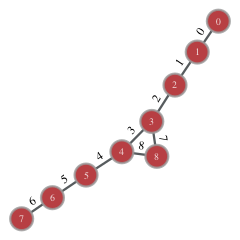

duration to compute matrix is = 0.011434078216552734


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 1, 0, 0, 2],
       [1, 2, 0, 0, 0, 0, 0, 2],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 1, 0, 0, 2],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0]])




isolated_G2


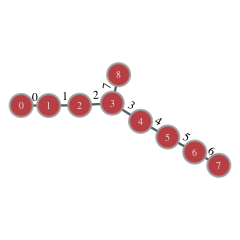

duration to compute matrix is = 0.009373903274536133


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0]])




isolated_G5


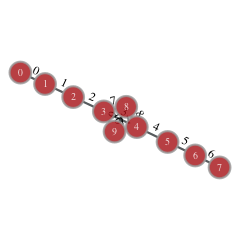

duration to compute matrix is = 0.014410018920898438


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 4, 0, 0, 3, 0, 0, 3],
       [2, 2, 0, 1, 0, 0, 0, 3],
       [0, 4, 0, 0, 3, 0, 0, 3],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 0],
       [2, 0, 0, 1, 0, 0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 0]])




isolated_G6


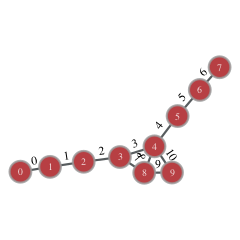

duration to compute matrix is = 0.016803741455078125


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 1, 0, 0, 2],
       [1, 3, 0, 0, 1, 0, 0, 3],
       [0, 4, 0, 0, 2, 0, 0, 3],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 1, 0, 1],
       [2, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0]])




isolated_G7_edge_belongs


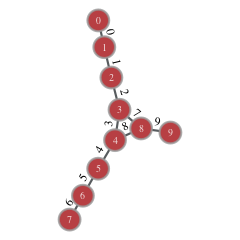

duration to compute matrix is = 0.015752077102661133


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 1, 0, 0, 2],
       [1, 2, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 1, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 2],
       [1, 2, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 1, 0, 0, 0]])




isolated_G7_vertex_belongs


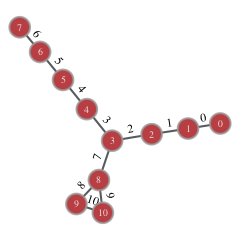

duration to compute matrix is = 0.010660886764526367


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 1, 0, 1, 4],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0]])




isolated_G8


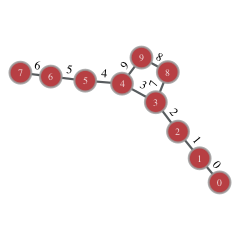

duration to compute matrix is = 0.007707118988037109


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 4, 0, 0, 0, 1, 2, 3],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 1, 0, 1],
       [0, 2, 0, 0, 0, 1, 0, 0],
       [0, 3, 0, 0, 0, 1, 0, 1]])




isolated_G9_vertex_belongs


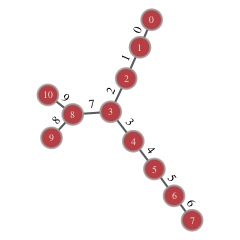

duration to compute matrix is = 0.009717941284179688


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 2, 4],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0]])




isolated_G9_edge_belongs


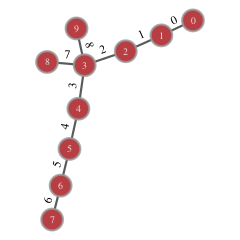

duration to compute matrix is = 0.010353803634643555


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 4, 0, 0, 0, 0, 0, 3],
       [0, 4, 0, 0, 0, 0, 0, 3],
       [0, 3, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0]])




isolated_G10_vertex_belongs


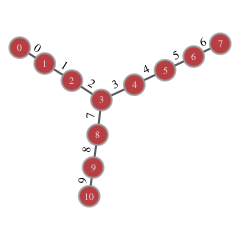

duration to compute matrix is = 0.007667064666748047


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0]])




isolated_G10_edge_belongs


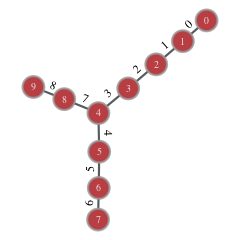

duration to compute matrix is = 0.008080005645751953


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0]])

In [123]:
all_names = ['isolated_G1','isolated_G2','isolated_G5','isolated_G6',
          'isolated_G7_edge_belongs','isolated_G7_vertex_belongs',
          'isolated_G8','isolated_G9_vertex_belongs',
          'isolated_G9_edge_belongs','isolated_G10_vertex_belongs',
          'isolated_G10_edge_belongs']
for name in all_names:
    print(name)
    G = graph(name)
    display(matrix_count(G, draw = 'yes'))
    print("\n\n")

In [ ]:
G = graph('brest')
count = matrix_count(G, draw = 'no')
count

<Graph object, undirected, with 30595 vertices and 41802 edges at 0x16700c580>


In [5]:
#Sv retourne içi 2 alors qu'il y en a 1, même raison que pour Te
#l'array retourne qu'il y a 2 Te alors qu'il y a 1 Te avec l'edge inclut dans Te, car Te est append de w
#is there an issue of local and global variables such that Sv can only take value 6 after edge 1 ?

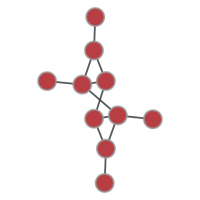

In [7]:
#TRASH 

#make two fonctions for including and excluding w from the set 

#graph
G = graph('siam')
draw(G)

#variables and arrays
V = tuple(G.vertices())
n = len(V)
E = tuple(G.edges())
m = len(E)

Vray = np.array(V, dtype = gt.libgraph_tool_core.Vertex)

Eray = np.array(E, dtype = gt.libgraph_tool_core.Edge)

v1 = Vray[4]

Vsome = Vray[6:9]

#if else pas égale
a = 1
b = 0
if a != b:
    print("non")
else:
    print("égal")

#si on a une liste, peut on mettre à jour cette liste par une forme plus proche de la syntaxe du code du paper
#i.e. pas liste.append(chose) mais liste = liste.append(chose) ? Non car liste.append() revoit un NoneType

liste = []
liste.append('chose')

#can remove element from liste 

liste = []
liste.append('chose')
display(liste)
liste.append('truc')
liste.remove('chose')
liste

#objects can be keys in dictionnaries

G = graph('siam')
e = tuple(G.edges())[0]

#call first and second vertex object in edge object that way
e, e.source(), e.target()

#can call edge object in these two same ways

tuple(G.edges())[0] == list(G.edges())[0]

#dictionnary is a lookup table 
e1 = tuple(G.vertices())[1]
e2 = tuple(G.vertices())[2]
e3 = tuple(G.vertices())[3]
e4 = tuple(G.vertices())[4]

table = dict()
table[e1] = 'lambda1'
table[e2] = 'lambda2'

table[e4] = 'lambda3' #add to lookup table

table[e4] == 'lambda3' #test value

#returns pair number liste of elements

liste = [0,1,2,3,4,5]

long = len(liste)
S = []
if long % 2 == 0: #pair
    S = liste
if long % 2 != 0: #impair
    S = liste[0:long-1]

#remove method removes first matching value in list from left

l = [1,2,1,3,4,1]

l.remove(1)
display(l)
l.remove(1)
display(l)
l.remove(1)
display(l)


#graphs for beta testing LOCALGRAPHLET
graphs = [graph('triangles'),graph('line'),
          graph('siam'),graph('2star'),
          graph('circle'),graph('single_triangle'),
          graph('single_2star'), graph('single_3star'), 
          graph('single_4star')]
execute = 0
if execute == 1: #handy way to not execute code
    for g in graphs:
        gtd.graph_draw(g, output_size = (70,70))
    
#local and global variables

x = "global"

def foo():
    print("x inside:", x)


foo()
print("x outside:", x)

'\n#TRASH \n\n#if else pas égale\na = 1\nb = 0\nif a != b:\n    print("non")\nelse:\n    print("égal")\n\n#si on a une liste, peut on mettre à jour cette liste par une forme plus proche de la syntaxe du code du paper\n#i.e. pas liste.append(chose) mais liste = liste.append(chose) ? Non car liste.append() revoit un NoneType\n\nliste = []\nliste.append(\'chose\')\n\n#can remove element from liste \n\nliste = []\nliste.append(\'chose\')\ndisplay(liste)\nliste.append(\'truc\')\nliste.remove(\'chose\')\nliste\n\n#objects can be keys in dictionnaries\n\nG = graph(\'siam\')\ne = tuple(G.edges())[0]\n\n#call first and second vertex object in edge object that way\ne, e.source(), e.target()\n\n#can call edge object in these two same ways\n\ntuple(G.edges())[0] == list(G.edges())[0]\n\n#dictionnary is a lookup table \ne1 = tuple(G.vertices())[1]\ne2 = tuple(G.vertices())[2]\ne3 = tuple(G.vertices())[3]\ne4 = tuple(G.vertices())[4]\n\ntable = dict()\ntable[e1] = \'lambda1\'\ntable[e2] = \'lambda2\

True